In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\USArrests.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
data['Unnamed: 0'].nunique()

50

In [6]:
data =  data.drop('Unnamed: 0',axis=1)

In [7]:
data.head

<bound method NDFrame.head of     Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  44.5
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.

In [8]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
x = data[['Murder','Assault','UrbanPop', 'Rape']]

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10,init='k-means++')
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


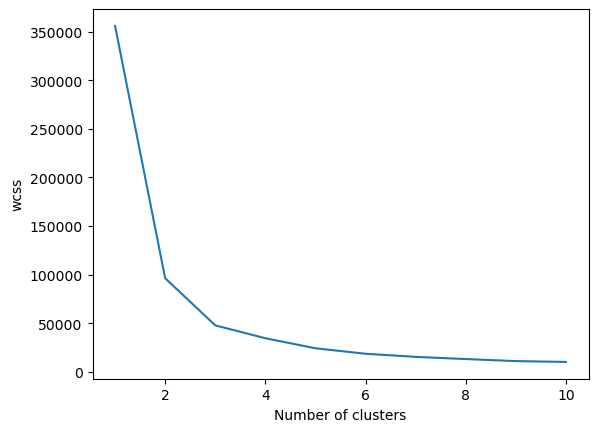

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel("wcss")
plt.show()

In [13]:
km = KMeans(n_clusters=3,n_init =10)

In [14]:
km.fit(x)

KMeans(n_clusters=3)

In [15]:
cluster_labels=km.predict(x)

In [16]:
cluster_labels

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [17]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [18]:
pd.Series(cluster_labels).value_counts()

1    20
2    16
0    14
dtype: int64

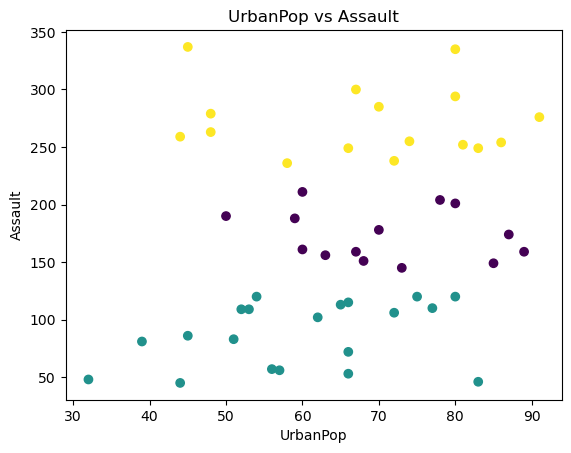

In [19]:
plt.scatter(x['UrbanPop'],x['Assault'],c=cluster_labels)
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.show()

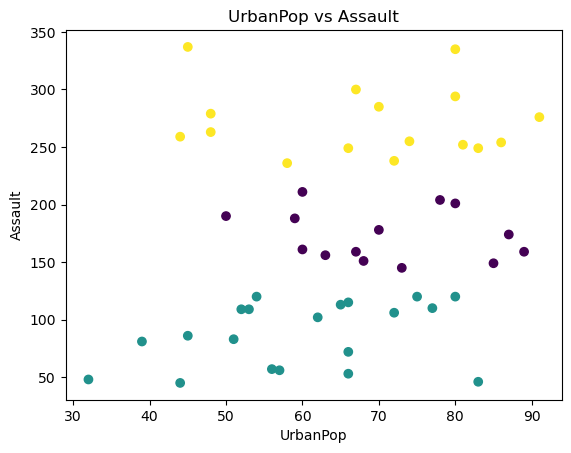

In [20]:
plt.scatter(x['UrbanPop'],x['Assault'],c=cluster_labels)
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.show()

In [21]:
data['cluster_labels']=cluster_labels

In [22]:
data

,Murder,Assault,UrbanPop,Rape,cluster_labels
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


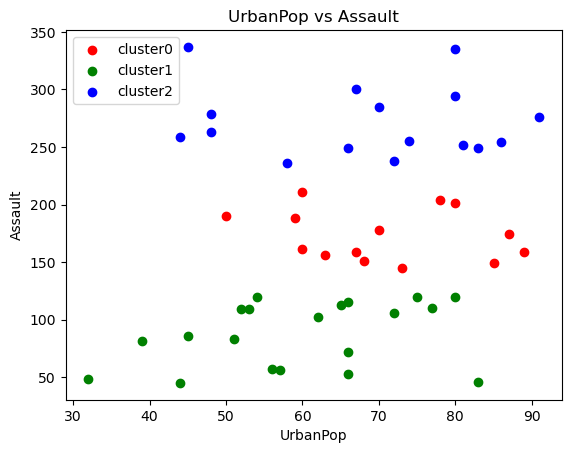

In [23]:
import matplotlib.pyplot as plt
# Assuming you have assigned colors to each cluster
colors = ['r','g','b'] # You can customize the colord
for i in range(max(cluster_labels)+1):
    cluster_data = x[cluster_labels==i]
    plt.scatter(cluster_data['UrbanPop'],
               cluster_data['Assault'],
               c=colors[i],
               label=f'cluster{i}')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.legend()
    

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
#sihouette score of kmeans clustering
silhouette_avg1 = silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.5319024108339817


In [26]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [27]:
mergings = linkage(x,method="ward") #ward,single,controid

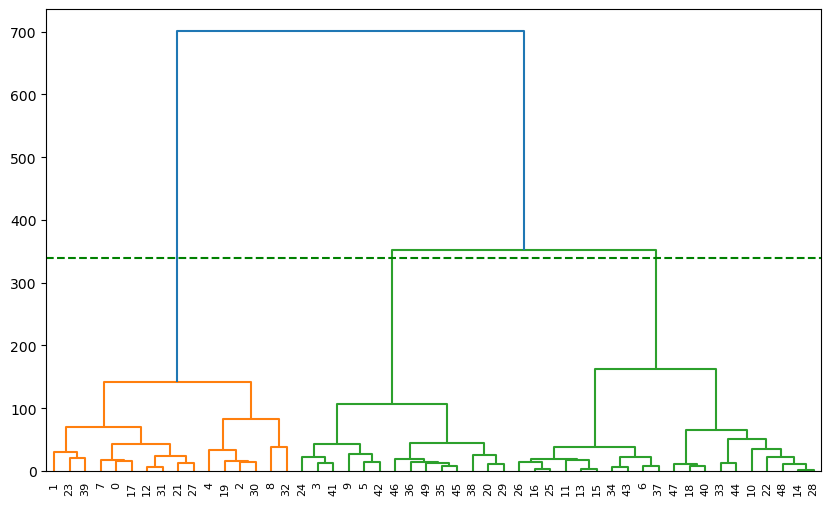

In [28]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(340,color='green',linestyle='--')
plt.show()

In [29]:
cluster_labels = fcluster(mergings,400,criterion="distance")

In [30]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

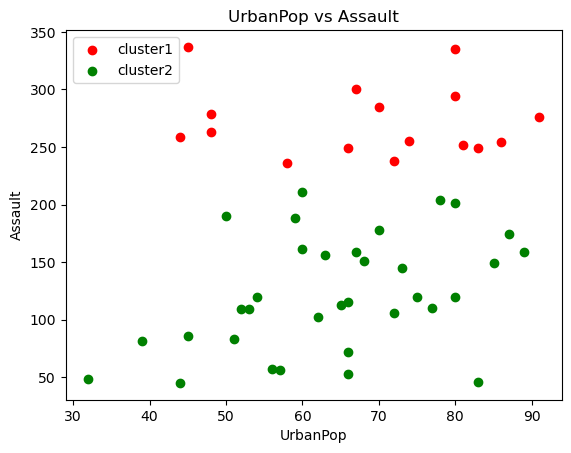

In [31]:
# Assuming you have assigned colors to each cluster
colors = ['r','g'] # You can customize the colord
for cluster_num in range(1,max(cluster_labels)+1):
    cluster_data = x[cluster_labels == cluster_num]
    plt.scatter(cluster_data['UrbanPop'],
               cluster_data['Assault'],
               c=colors[cluster_num-1],
               label=f'cluster{cluster_num}')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.legend()

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
#sihouette score of kmeans clustering
silhouette_avg1 = silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.576270501827592
